In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.preprocessing import image
# Instead of importing from keras.preprocessing.image, import from tf.keras.utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img = image.load_img('/content/cat_DA.jpg',target_size=(200,200))

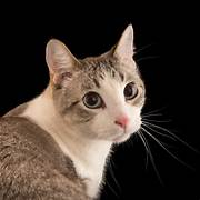

In [3]:
img

In [4]:
type(img)

PIL.Image.Image

In [5]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
img = image.img_to_array(img)

In [7]:
type(img)

numpy.ndarray

In [8]:
img.shape

(200, 200, 3)

In [9]:
input_batch = img.reshape(1,200,200,3)

In [10]:
import os
if not os.path.exists('aug'):
    os.makedirs('aug')

i = 0
for output in datagen.flow(input_batch, batch_size=1, save_to_dir='aug'):
    i += 1
    if i == 10:
        break

In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-04-17 17:16:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 192.178.155.207, 142.251.179.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   186MB/s    in 0.4s    

2025-04-17 17:16:44 (186 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [12]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')